In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
path='MD1/csv/'
model='out_step1.csv'
params='param_step1.csv'
model='out_step2.csv'
params='param_step2.csv'
model='out_step2-old3.csv'
params='param_step2-old3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

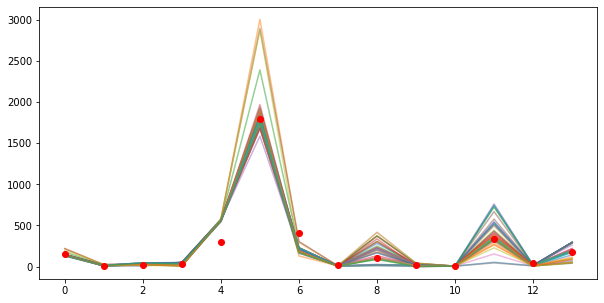

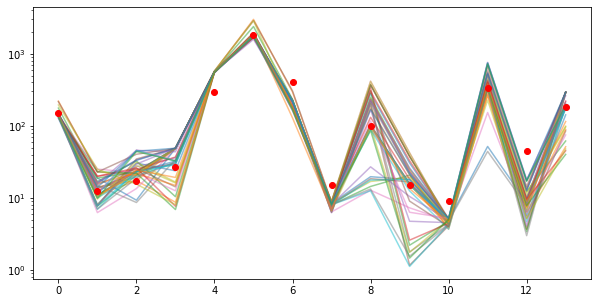

In [3]:
def match_plot(df,logy=False):
    df.iloc[0:-1,:].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5))
    df.iloc[-1,:].plot(logy=logy,legend=False,style="o",color='red');

match_plot(df_model)
match_plot(df_model,logy=True)

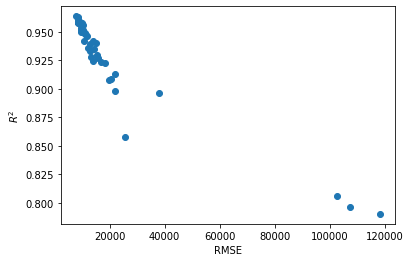

In [4]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

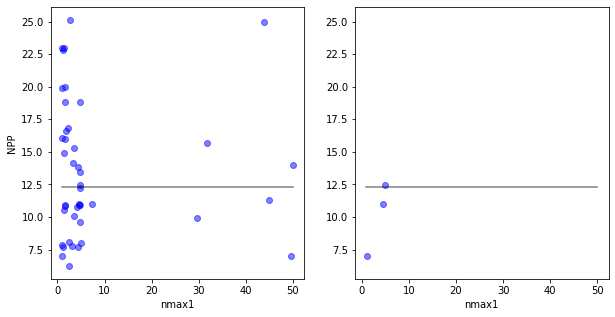

In [21]:
def plot_paramsvstarget(x,y,r2,i=1,xlabel='nmax1',ylabel='NPP'):
    
    tight_params=x[r2>0.96]
    tight_model=y.iloc[0:-1,:][r2>0.96]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    ax1.plot(x.iloc[:,i],y.iloc[0:-1,i],'o',alpha=0.5,color='b')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_ylim([min(y.iloc[:,i])-1, max(y.iloc[:,i]+1)])
    x1=min(x.iloc[:,i])
    x2=max(x.iloc[:,i])
    ax1.plot(np.linspace(x1,x2,10),np.ones(10)*y.iloc[-1,i],alpha=0.5,color='black')

    ax2.plot(tight_params.iloc[:,i],tight_model.iloc[:,i],'o',alpha=0.5,color='b')
    ax2.set_xlabel(xlabel)
    ax2.plot(np.linspace(x1,x2,10),np.ones(10)*y.iloc[-1,i],alpha=0.5,color='black')
    ax2.set_ylim([min(y.iloc[:,i])-1, max(y.iloc[:,i])+1])

plot_paramsvstarget(df_param,df_model,r2,i=1,xlabel='nmax1',ylabel='NPP')

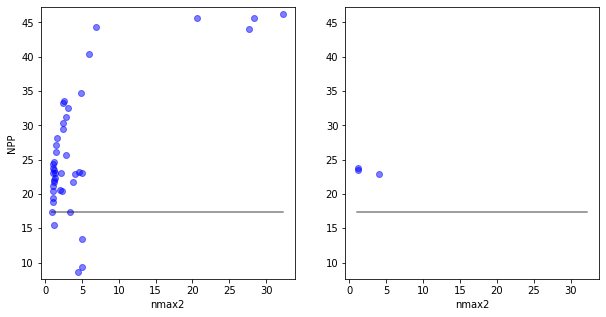

In [22]:
plot_paramsvstarget(df_param,df_model,r2,i=2,xlabel='nmax2',ylabel='NPP')

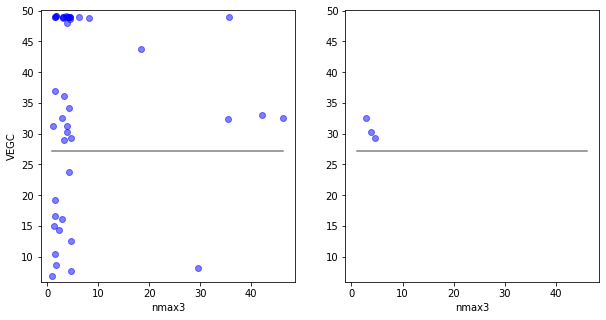

In [23]:
plot_paramsvstarget(df_param,df_model,r2,i=3,xlabel='nmax3',ylabel='VEGC')

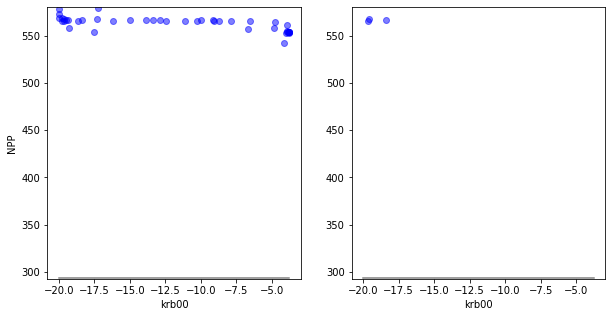

In [24]:
plot_paramsvstarget(df_param,df_model,r2,i=4,xlabel='krb00',ylabel='NPP')

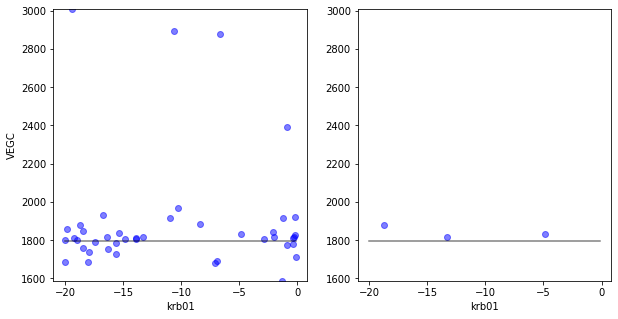

In [25]:
plot_paramsvstarget(df_param,df_model,r2,i=5,xlabel='krb01',ylabel='VEGC')

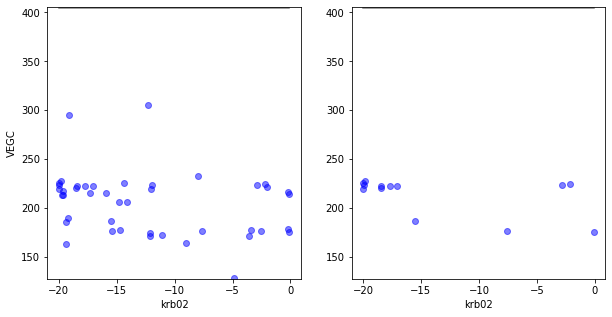

In [12]:
plot_paramsvstarget(df_param,df_model,r2,i=6,xlabel='krb02',ylabel='VEGC')

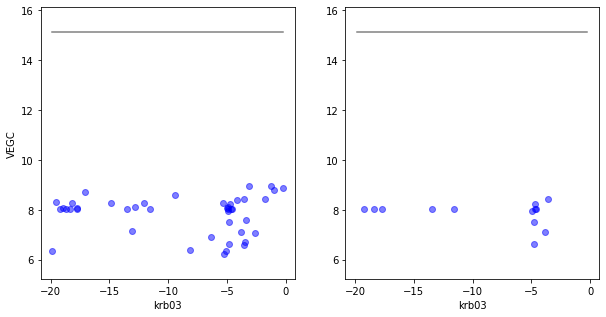

In [13]:
plot_paramsvstarget(df_param,df_model,r2,i=7,xlabel='krb03',ylabel='VEGC')

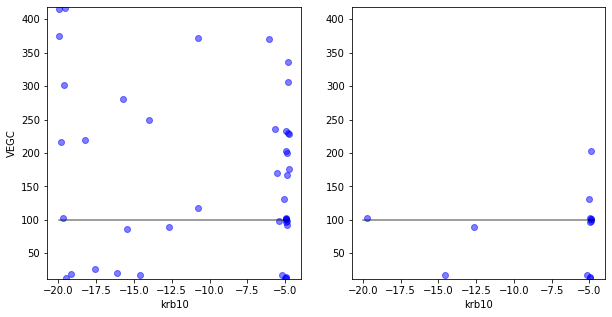

In [14]:
plot_paramsvstarget(df_param,df_model,r2,i=8,xlabel='krb10',ylabel='VEGC')

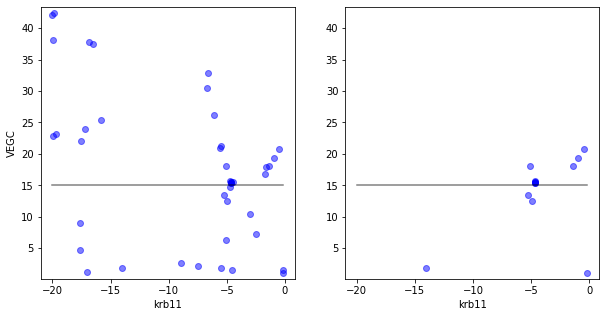

In [15]:
plot_paramsvstarget(df_param,df_model,r2,i=9,xlabel='krb11',ylabel='VEGC')

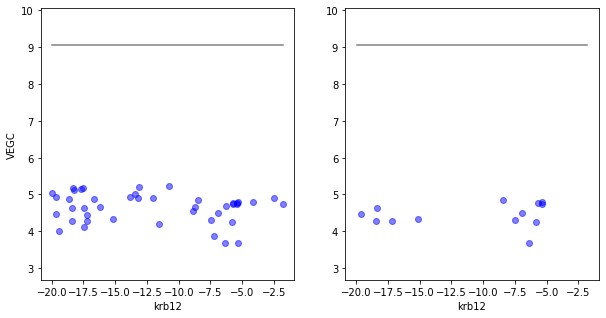

In [16]:
plot_paramsvstarget(df_param,df_model,r2,i=10,xlabel='krb12',ylabel='VEGC')

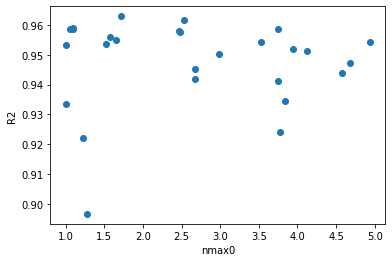

In [16]:
plt.plot(df_param.iloc[:,0],r2,'o');
plt.xlabel('nmax0'), plt.ylabel('R2');